# 선 그래프 (Line Plot)
## 기본 선 그래프

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

# 시계열 데이터 생성
dates = pd.date_range('2024-01-01', periods=30, freq='D')
values = np.cumsum(np.random.randn(30)) + 100

time_series = pd.DataFrame({
    '날짜': dates,
    '주가': values
})

fig = px.line(time_series, x='날짜', y='주가',
              title='일별 주가 변동',
              markers=True)
fig.show()

## 다중 선 그래프

In [2]:
# 여러 회사의 주가 비교
companies = ['삼성전자', 'LG전자', 'SK하이닉스']
stock_data = []

for company in companies:
    for i, date in enumerate(dates):
        price = 100 + np.cumsum(np.random.randn(1))[0] * (i + 1) / 10
        stock_data.append({'날짜': date, '회사': company, '주가': price})

df_stocks = pd.DataFrame(stock_data)

fig = px.line(df_stocks, x='날짜', y='주가', 
              color='회사', # seaborn에서 hue
              title='회사별 주가 비교',
              line_dash='회사')  # 선 스타일을 다르게 설정
fig.show()

# 산점도 (Scatter Plot)

In [3]:
# 키와 몸무게 데이터
height_weight = {
    '키': [160, 165, 170, 175, 180, 162, 168, 172, 178, 185],
    '몸무게': [55, 60, 65, 70, 75, 58, 63, 68, 73, 80],
    '성별': ['여성', '여성', '여성', '남성', '남성', 
           '여성', '여성', '남성', '남성', '남성']
}

df_body = pd.DataFrame(height_weight)

fig = px.scatter(df_body, x='키', y='몸무게',
                 title='키와 몸무게의 관계')
fig.show()


## 그룹별 산점도

In [4]:
# 성별로 구분한 산점도
fig = px.scatter(df_body, x='키', y='몸무게', 
                 color='성별',
                 title='성별에 따른 키와 몸무게 관계',
                 size_max=15)

# 회귀선 추가
fig.update_layout(
    xaxis_title="키 (cm)",
    yaxis_title="몸무게 (kg)"
)

fig.show()

## 버블 차트

In [5]:
# 크기까지 고려한 버블 차트
countries = {
    '국가': ['한국', '일본', '중국', '미국', '독일'],
    'GDP': [1800, 4200, 14000, 21000, 3800],
    '인구': [51, 126, 1400, 330, 83],
    '대륙': ['아시아', '아시아', '아시아', '북미', '유럽']
}

df_countries = pd.DataFrame(countries)

fig = px.scatter(df_countries, x='GDP', y='인구',
                 size='GDP', color='대륙',
                 hover_name='국가',
                 title='국가별 GDP와 인구 관계',
                 size_max=60)

fig.update_layout(
    xaxis_title="GDP (억 달러)",
    yaxis_title="인구 (백만명)"
)

fig.show()

# 막대 그래프 (Bar Chart)

## 세로 막대 그래프

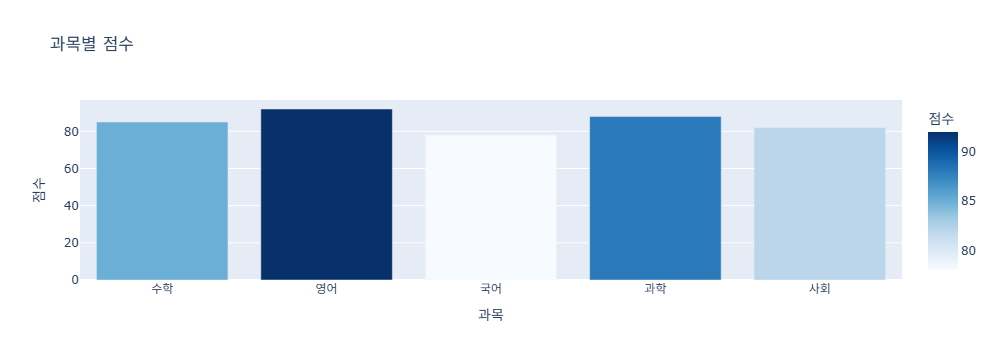

In [19]:
# 과목별 점수 데이터
subjects = {
    '과목': ['수학', '영어', '국어', '과학', '사회'],
    '점수': [85, 92, 78, 88, 82]
}

df_scores = pd.DataFrame(subjects)

fig = px.bar(df_scores, x='과목', y='점수',
             title='과목별 점수',
             color='점수',
             color_continuous_scale='Blues')
fig.show()


## 가로 막대 그래프

In [7]:
# 가로 막대 그래프로 표시
fig = px.bar(df_scores, x='점수', y='과목',
             title='과목별 점수 (가로형)',
             orientation='h',
             color='점수',
             color_continuous_scale='Viridis')
fig.show()

## 그룹 막대 그래프

In [8]:
# 학급별 과목 점수 비교
class_scores = {
    '과목': ['수학', '영어', '국어', '과학'] * 3,
    '점수': [85, 92, 78, 88, 82, 88, 75, 90, 80, 85, 82, 86],
    '학급': ['1반'] * 4 + ['2반'] * 4 + ['3반'] * 4
}

df_class = pd.DataFrame(class_scores)

fig = px.bar(df_class, x='과목', y='점수',
             color='학급',
             title='학급별 과목 점수 비교',
             barmode='group')  # 'stack'으로 변경하면 누적 막대

fig.update_layout(
    xaxis_title="과목",
    yaxis_title="점수"
)

fig.show()

# 히스토그램 (Histogram)

## 기본 히스토그램

In [9]:
# 시험 점수 분포 데이터
np.random.seed(42)
scores = np.random.normal(75, 15, 1000)  # 평균 75, 표준편차 15
scores = np.clip(scores, 0, 100)  # 0-100 사이로 제한

df_hist = pd.DataFrame({'점수': scores})

fig = px.histogram(df_hist, x='점수',
                   title='시험 점수 분포',
                   nbins=20,  # 구간 수
                   marginal='rug')  # 개별 데이터 포인트 표시

fig.update_layout(
    xaxis_title="점수",
    yaxis_title="빈도"
)

fig.show()

## 그룹별 히스토그램

In [10]:
# 성별 키 분포 비교
height_data = []
np.random.seed(42)

# 남성 키 데이터 (평균 175cm)
male_heights = np.random.normal(175, 6, 500)
for height in male_heights:
    height_data.append({'키': height, '성별': '남성'})

# 여성 키 데이터 (평균 162cm)
female_heights = np.random.normal(162, 5, 500)
for height in female_heights:
    height_data.append({'키': height, '성별': '여성'})

df_heights = pd.DataFrame(height_data)

fig = px.histogram(df_heights, x='키', 
                   color='성별',
                   title='성별 키 분포 비교',
                   marginal='box',  # 박스플롯 추가
                   opacity=0.7,
                   barmode='overlay')

fig.update_layout(
    xaxis_title="키 (cm)",
    yaxis_title="빈도"
)

fig.show()

# 캔들스틱 차트 (주가 데이터용)

## 기본 캔들스틱 차트

In [11]:
import plotly.graph_objects as go
from datetime import datetime, timedelta

# 주가 데이터 생성
dates = [datetime.now() - timedelta(days=x) for x in range(30, 0, -1)]
np.random.seed(42)

ohlc_data = []
price = 100

for date in dates:
    open_price = price
    high_price = open_price + np.random.uniform(0, 5)
    low_price = open_price - np.random.uniform(0, 5)
    close_price = open_price + np.random.uniform(-3, 3)

    ohlc_data.append({
        '날짜': date,
        '시가': open_price,
        '고가': high_price,
        '저가': low_price,
        '종가': close_price
    })

    price = close_price

df_ohlc = pd.DataFrame(ohlc_data)

# 캔들스틱 차트 생성
fig = go.Figure(data=go.Candlestick(
    x=df_ohlc['날짜'],
    open=df_ohlc['시가'],
    high=df_ohlc['고가'],
    low=df_ohlc['저가'],
    close=df_ohlc['종가'],
    name='주가'
))

fig.update_layout(
    title='일별 주가 캔들스틱 차트',
    xaxis_title='날짜',
    yaxis_title='가격',
    xaxis_rangeslider_visible=False  # 하단 범위 슬라이더 제거
)

fig.show()

## 거래량과 함께 표시

In [12]:
# 거래량 데이터 추가
df_ohlc['거래량'] = np.random.randint(1000, 10000, len(df_ohlc))

# 서브플롯 생성
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=('주가', '거래량'),
    row_width=[0.2, 0.7]
)

# 캔들스틱 차트
fig.add_trace(
    go.Candlestick(
        x=df_ohlc['날짜'],
        open=df_ohlc['시가'],
        high=df_ohlc['고가'],
        low=df_ohlc['저가'],
        close=df_ohlc['종가'],
        name='주가'
    ),
    row=1, col=1
)

# 거래량 막대 차트
fig.add_trace(
    go.Bar(
        x=df_ohlc['날짜'],
        y=df_ohlc['거래량'],
        name='거래량',
        marker_color='rgba(158,202,225,0.8)'
    ),
    row=2, col=1
)

fig.update_layout(
    title='주가와 거래량',
    xaxis_rangeslider_visible=False
)

fig.show()

# 지도 시각화 (Choropleth Map)

## 기본 지역 지도

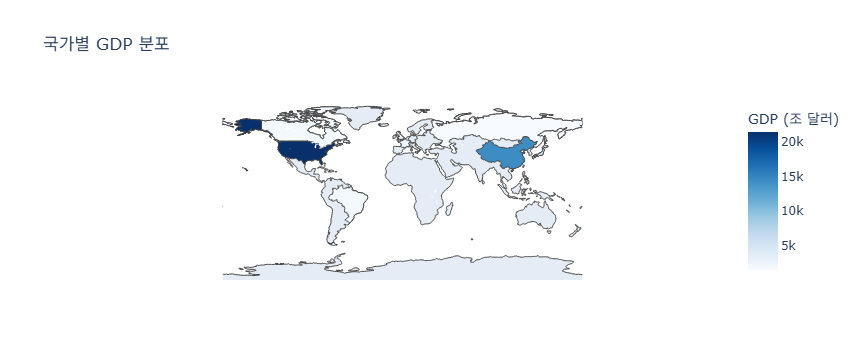

In [20]:
# 한국 시도별 인구 데이터 (예시)
korea_population = {
    '시도': ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원'],
    '인구': [9720, 3413, 2438, 2947, 1441, 1475, 1136, 13427, 1536],
    '코드': ['KR-11', 'KR-26', 'KR-27', 'KR-28', 'KR-29', 'KR-30', 'KR-31', 'KR-41', 'KR-42']
}

df_population = pd.DataFrame(korea_population)

# 세계 지도 예시 (국가별 데이터)
world_data = {
    '국가': ['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'FRA', 'ITA', 'BRA', 'CAN', 'RUS'],
    'GDP': [21427, 14342, 5082, 3846, 2827, 2716, 2001, 1869, 1736, 1483],
    '국가코드': ['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'FRA', 'ITA', 'BRA', 'CAN', 'RUS']
}

df_world = pd.DataFrame(world_data)

fig = px.choropleth(
    df_world,
    locations='국가코드',
    color='GDP',
    hover_name='국가',
    title='국가별 GDP 분포',
    color_continuous_scale='Blues',
    labels={'GDP': 'GDP (조 달러)'}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()

## 산점도 지도

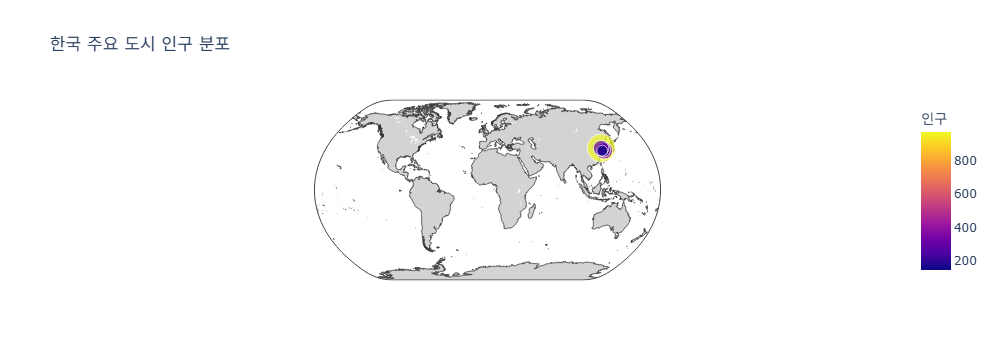

In [14]:
# 도시별 인구와 위치
cities = {
    '도시': ['서울', '부산', '대구', '인천', '광주'],
    '위도': [37.5665, 35.1796, 35.8714, 37.4563, 35.1595],
    '경도': [126.9780, 129.0756, 128.6014, 126.7052, 126.8526],
    '인구': [972, 341, 244, 295, 144]
}

df_cities = pd.DataFrame(cities)

fig = px.scatter_geo(
    df_cities,
    lat='위도',
    lon='경도',
    size='인구',
    color='인구',
    hover_name='도시',
    title='한국 주요 도시 인구 분포',
    projection='natural earth'
)

fig.update_geos(
    resolution=50,
    showland=True,
    landcolor='lightgray'
)

fig.show()